In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
from tensorflow.keras import layers, models
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def load_and_preprocess_data(folder_path,label):
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path,filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(64,64))
        img = img/255.0
        images.append(img)
        labels.append(label)
    return images,labels

image loading


In [12]:
apple_images,apple_labels=load_and_preprocess_data('/content/drive/MyDrive/apple',label=0)
orange_images,orange_labels=load_and_preprocess_data('/content/drive/MyDrive/orange',label=1)

tranning

In [13]:
all_images = np.concatenate([apple_images,orange_images],axis=0)
all_labels = np.concatenate([apple_labels,orange_labels],axis=0)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(all_images,all_labels,test_size = 0.2,random_state=42)

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation = 'relu',input_shape=(64,64,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(1,activation ='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [17]:
print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)


Train shape: (1020, 64, 64, 3) (1020,)
Test shape: (255, 64, 64, 3) (255,)


In [18]:
model_msk = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 339ms/step - accuracy: 0.7183 - loss: 0.5386 - val_accuracy: 0.8980 - val_loss: 0.2547
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 402ms/step - accuracy: 0.9083 - loss: 0.2445 - val_accuracy: 0.9176 - val_loss: 0.1944
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 383ms/step - accuracy: 0.9307 - loss: 0.1921 - val_accuracy: 0.9333 - val_loss: 0.1751
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 302ms/step - accuracy: 0.9490 - loss: 0.1372 - val_accuracy: 0.9333 - val_loss: 0.1625
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 357ms/step - accuracy: 0.9413 - loss: 0.1400 - val_accuracy: 0.9412 - val_loss: 0.1419
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 361ms/step - accuracy: 0.9365 - loss: 0.1493 - val_accuracy: 0.9255 - val_loss: 0.1658
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 342ms/step - accuracy: 0.9644 - loss: 0.1115 - val_accuracy: 0.9333 - val_loss: 0.1535
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 356ms/step - accuracy: 0.9631 - loss: 0.0970 - val_accu

In [19]:
def preprocess_image(img):
    img = cv2.resize(img,(64,64))
    img = img/255.0
    img = np.expand_dims(img,axis=0)
    return img

In [20]:
def predict_mask(image):
    img = preprocess_image(image)
    prediction= model.predict(img)
    if prediction[0][0]<0.5:
        return "Apple"
    else:
        return "Orange"

testing

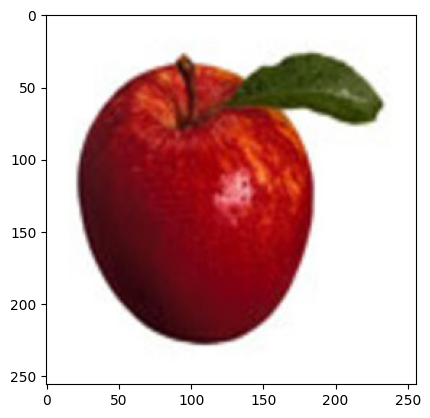

In [23]:
image_path= '/content/n07740461_2359.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


'Apple'

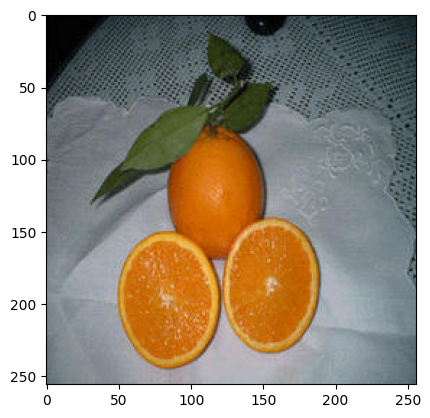

In [25]:
image_path= '/content/n07749192_374.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


'Orange'

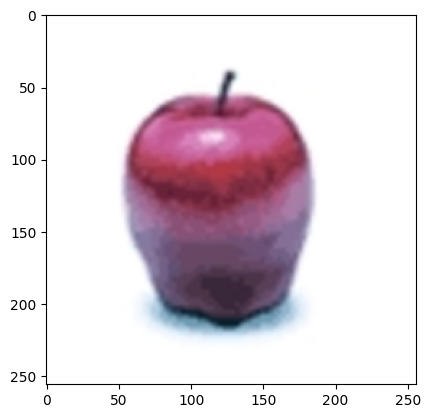

In [27]:
image_path= '/content/n07740461_2329.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


'Apple'

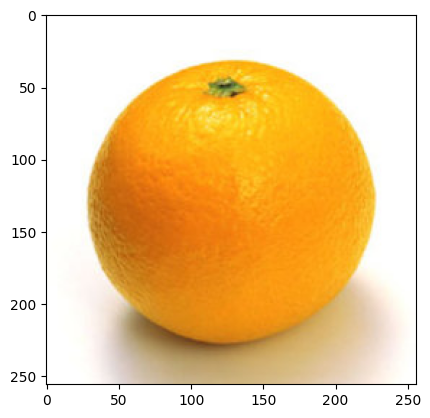

In [29]:
image_path= '/content/n07749192_183.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


'Orange'

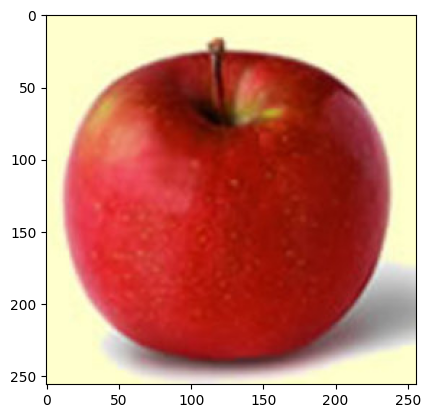

In [31]:
image_path= '/content/n07740461_2583.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


'Apple'

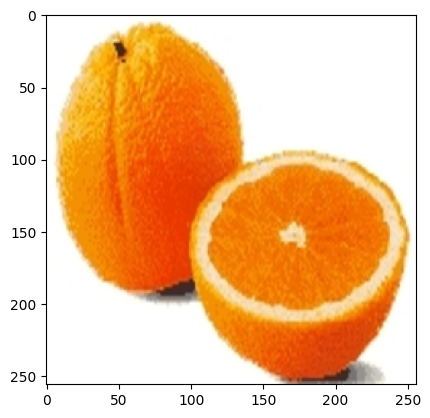

In [33]:
image_path= '/content/n07749192_1251.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


'Orange'

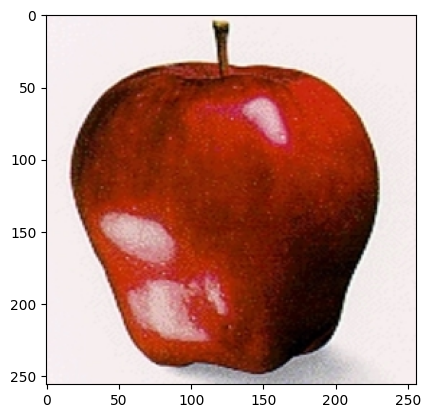

In [36]:
image_path= '/content/n07740461_51.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [37]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


'Apple'

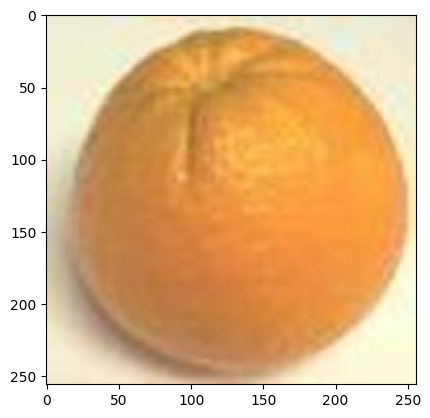

In [40]:
image_path= '/content/n07749192_4031.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [41]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


'Orange'

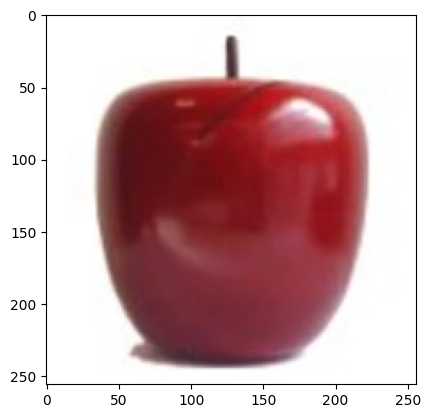

In [42]:
image_path= '/content/n07740461_3458.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [43]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


'Apple'

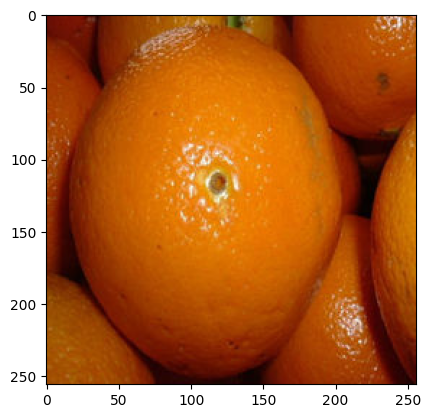

In [44]:
image_path= '/content/n07749192_7751.jpg'
image = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [45]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


'Orange'